In [265]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [266]:
import pandas as pd
import numpy as np
import os
import warnings
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import catboost as cab
import xgboost as xgb

from sklearn.metrics import log_loss, recall_score, precision_score,roc_auc_score, confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV,calibration_curve
import scikitplot as skplt
import jm_mp

In [68]:
warnings.filterwarnings('ignore')
df = pd.read_csv(r'D:\z7z8\DS_MiniProject_ANON\processed_data.csv')
df.drop(['agegrp',
       'tensuregrp'],axis =1,inplace = True)

In [177]:
jp.wide_view(df.head())

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag,Weekday
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,0.0,5.0,0.0,0.0,6.0,0,0,1,0,2,0,3,0,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0,3,0,0,0,3,3,0,0,0,0,0,0,0,5
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,0,0,6,0,0,0,6,0,0,0,0,0,0,0,3
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


### CATBoost

In [144]:
float_features  = df.select_dtypes(include = [np.float]).columns.tolist()
X = df.copy()
X[float_features] = X[float_features].fillna(-9)
X[float_features] = X[float_features].astype(np.int64)
print(X.dtypes)

DATE_FOR                 object
RTD_ST_CD                object
CustomerSegment          object
Tenure                    int64
Age                       int64
MART_STATUS              object
GENDER                   object
CHANNEL1_6M               int64
CHANNEL2_6M               int64
CHANNEL3_6M               int64
CHANNEL4_6M               int64
CHANNEL5_6M               int64
METHOD1_6M                int64
RECENT_PAYMENT            int64
PAYMENTS_6M               int64
CHANNEL1_3M               int64
CHANNEL2_3M               int64
CHANNEL3_3M               int64
CHANNEL4_3M               int64
CHANNEL5_3M               int64
METHOD1_3M                int64
PAYMENTS_3M               int64
NOT_DI_3M                 int64
NOT_DI_6M                 int64
EVENT1_30_FLAG            int64
EVENT2_90_SUM             int64
LOGINS                    int64
POLICYPURCHASECHANNEL     int64
Call_Flag                 int64
Weekday                   int64
dtype: object


In [145]:
X = X[[col for col in X.columns if X[col].nunique() >1]]
y = X['Call_Flag']
X.drop('Call_Flag',axis = 1, inplace =True)

str_features = X_train.select_dtypes(exclude = [np.number]).columns.tolist()
num_features = X_train.select_dtypes(include = [np.number]).columns.tolist()

#### Tunning Hyperparameters

In [153]:
X_tun = pd.concat([X,y],axis =1).sample(frac = 0.1,random_state =99).reset_index(drop = True)
y_tun = X_tun['Call_Flag']
X_tun.drop('Call_Flag',axis =1,inplace =True)

params_dict  = {'depth':[3,4,5],
               'iterations':[100,200,300,400,500],
               'learning_rate':list(np.arange(0.01,0.1,0.03)),
               'l2_leaf_reg':list(np.arange(0.1,6,0.8)),
               'min_data_in_leaf':list(np.arange(10,150,20))}
cbc = cab.CatBoostClassifier(early_stopping_rounds=100,eval_metric = 'Logloss',
                            cat_features = num_features+str_features,verbose = False)

In [154]:
%%time
rand_cv = RandomizedSearchCV(cbc,param_distributions = params_dict,cv =3,n_iter =20,n_jobs=3)
rand_cv.fit(X_tun,y_tun)

0:	learn: 0.6337039	total: 97.9ms	remaining: 39.1s
1:	learn: 0.5810603	total: 131ms	remaining: 26.1s
2:	learn: 0.5339764	total: 217ms	remaining: 28.7s
3:	learn: 0.4916205	total: 336ms	remaining: 33.3s
4:	learn: 0.4537154	total: 444ms	remaining: 35.1s
5:	learn: 0.4211456	total: 465ms	remaining: 30.5s
6:	learn: 0.3922660	total: 485ms	remaining: 27.2s
7:	learn: 0.3662087	total: 593ms	remaining: 29.1s
8:	learn: 0.3435400	total: 615ms	remaining: 26.7s
9:	learn: 0.3231779	total: 709ms	remaining: 27.6s
10:	learn: 0.3053513	total: 738ms	remaining: 26.1s
11:	learn: 0.2872145	total: 868ms	remaining: 28.1s
12:	learn: 0.2707427	total: 948ms	remaining: 28.2s
13:	learn: 0.2585529	total: 975ms	remaining: 26.9s
14:	learn: 0.2476974	total: 1s	remaining: 25.7s
15:	learn: 0.2362808	total: 1.11s	remaining: 26.6s
16:	learn: 0.2258844	total: 1.25s	remaining: 28.3s
17:	learn: 0.2159832	total: 1.38s	remaining: 29.3s
18:	learn: 0.2094058	total: 1.4s	remaining: 28.1s
19:	learn: 0.2017904	total: 1.46s	remaining:

163:	learn: 0.1137817	total: 17.6s	remaining: 25.4s
164:	learn: 0.1137719	total: 17.7s	remaining: 25.3s
165:	learn: 0.1136866	total: 17.8s	remaining: 25.1s
166:	learn: 0.1136396	total: 17.9s	remaining: 25s
167:	learn: 0.1136076	total: 18s	remaining: 24.9s
168:	learn: 0.1135407	total: 18.1s	remaining: 24.7s
169:	learn: 0.1134959	total: 18.2s	remaining: 24.6s
170:	learn: 0.1134949	total: 18.3s	remaining: 24.5s
171:	learn: 0.1134729	total: 18.4s	remaining: 24.4s
172:	learn: 0.1134421	total: 18.5s	remaining: 24.3s
173:	learn: 0.1133885	total: 18.7s	remaining: 24.2s
174:	learn: 0.1133476	total: 18.8s	remaining: 24.2s
175:	learn: 0.1133317	total: 18.9s	remaining: 24s
176:	learn: 0.1132937	total: 19s	remaining: 23.9s
177:	learn: 0.1132749	total: 19.1s	remaining: 23.8s
178:	learn: 0.1132533	total: 19.2s	remaining: 23.7s
179:	learn: 0.1132233	total: 19.3s	remaining: 23.6s
180:	learn: 0.1131260	total: 19.5s	remaining: 23.6s
181:	learn: 0.1131092	total: 19.6s	remaining: 23.5s
182:	learn: 0.113107

322:	learn: 0.1083433	total: 35.7s	remaining: 8.52s
323:	learn: 0.1082954	total: 35.9s	remaining: 8.42s
324:	learn: 0.1082340	total: 36s	remaining: 8.31s
325:	learn: 0.1082281	total: 36.1s	remaining: 8.2s
326:	learn: 0.1082118	total: 36.2s	remaining: 8.09s
327:	learn: 0.1082065	total: 36.3s	remaining: 7.97s
328:	learn: 0.1081459	total: 36.5s	remaining: 7.87s
329:	learn: 0.1081109	total: 36.6s	remaining: 7.77s
330:	learn: 0.1080475	total: 36.7s	remaining: 7.66s
331:	learn: 0.1080171	total: 36.9s	remaining: 7.55s
332:	learn: 0.1080031	total: 37s	remaining: 7.44s
333:	learn: 0.1079995	total: 37s	remaining: 7.32s
334:	learn: 0.1079929	total: 37.2s	remaining: 7.21s
335:	learn: 0.1079596	total: 37.3s	remaining: 7.1s
336:	learn: 0.1079313	total: 37.4s	remaining: 6.99s
337:	learn: 0.1079002	total: 37.5s	remaining: 6.88s
338:	learn: 0.1078494	total: 37.6s	remaining: 6.76s
339:	learn: 0.1078283	total: 37.8s	remaining: 6.67s
340:	learn: 0.1078154	total: 37.9s	remaining: 6.56s
341:	learn: 0.107781

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001E5094FA048>,
                   n_iter=20, n_jobs=3,
                   param_distributions={'depth': [3, 4, 5],
                                        'iterations': [100, 200, 300, 400, 500],
                                        'l2_leaf_reg': [0.1, 0.9,
                                                        1.7000000000000002,
                                                        2.5000000000000004,
                                                        3.3000000000000003, 4.1,
                                                        4.9, 5.7],
                                        'learning_rate': [0.01, 0.04,
                                                          0.06999999999999999,
                                                          0.09999999999999999],
                                        'min_data_in_leaf': [10, 30, 50, 70, 90,
                        

#### Model Training

In [172]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 99)

Wall time: 145 ms


In [173]:
%%time
cbc = rand_cv.best_estimator_.fit(X_train,y_train)

y_pred_test = cbc.predict_proba(X_test)
y_pred_train = cbc.predict_proba(X_train)


0:	learn: 0.6338401	total: 128ms	remaining: 51.1s
1:	learn: 0.5815081	total: 302ms	remaining: 1m
2:	learn: 0.5350264	total: 505ms	remaining: 1m 6s
3:	learn: 0.4930737	total: 704ms	remaining: 1m 9s
4:	learn: 0.4564222	total: 887ms	remaining: 1m 10s
5:	learn: 0.4229821	total: 1.11s	remaining: 1m 13s
6:	learn: 0.3941156	total: 1.31s	remaining: 1m 13s
7:	learn: 0.3683716	total: 1.51s	remaining: 1m 14s
8:	learn: 0.3457390	total: 1.63s	remaining: 1m 10s
9:	learn: 0.3257548	total: 1.78s	remaining: 1m 9s
10:	learn: 0.3080773	total: 1.83s	remaining: 1m 4s
11:	learn: 0.2923674	total: 1.87s	remaining: 1m
12:	learn: 0.2753166	total: 2.06s	remaining: 1m 1s
13:	learn: 0.2606070	total: 2.18s	remaining: 1m
14:	learn: 0.2486164	total: 2.34s	remaining: 1m
15:	learn: 0.2366941	total: 2.55s	remaining: 1m 1s
16:	learn: 0.2268603	total: 2.76s	remaining: 1m 2s
17:	learn: 0.2181408	total: 2.95s	remaining: 1m 2s
18:	learn: 0.2098228	total: 3.14s	remaining: 1m 3s
19:	learn: 0.2007004	total: 3.38s	remaining: 1m 

160:	learn: 0.1179789	total: 37.5s	remaining: 55.6s
161:	learn: 0.1179605	total: 37.7s	remaining: 55.4s
162:	learn: 0.1179486	total: 38s	remaining: 55.2s
163:	learn: 0.1179341	total: 38.2s	remaining: 55s
164:	learn: 0.1179207	total: 38.5s	remaining: 54.8s
165:	learn: 0.1179115	total: 38.7s	remaining: 54.6s
166:	learn: 0.1178923	total: 39s	remaining: 54.4s
167:	learn: 0.1178906	total: 39.1s	remaining: 53.9s
168:	learn: 0.1178633	total: 39.3s	remaining: 53.7s
169:	learn: 0.1178391	total: 39.5s	remaining: 53.5s
170:	learn: 0.1178197	total: 39.8s	remaining: 53.3s
171:	learn: 0.1178109	total: 40s	remaining: 53.1s
172:	learn: 0.1177794	total: 40.2s	remaining: 52.8s
173:	learn: 0.1177464	total: 40.5s	remaining: 52.6s
174:	learn: 0.1177311	total: 40.7s	remaining: 52.4s
175:	learn: 0.1177255	total: 40.9s	remaining: 52s
176:	learn: 0.1177014	total: 41.1s	remaining: 51.8s
177:	learn: 0.1176910	total: 41.4s	remaining: 51.6s
178:	learn: 0.1176899	total: 41.6s	remaining: 51.4s
179:	learn: 0.1176678	

319:	learn: 0.1159574	total: 1m 16s	remaining: 19s
320:	learn: 0.1159426	total: 1m 16s	remaining: 18.8s
321:	learn: 0.1159220	total: 1m 16s	remaining: 18.6s
322:	learn: 0.1159204	total: 1m 16s	remaining: 18.3s
323:	learn: 0.1159187	total: 1m 17s	remaining: 18.1s
324:	learn: 0.1159125	total: 1m 17s	remaining: 17.9s
325:	learn: 0.1159057	total: 1m 17s	remaining: 17.6s
326:	learn: 0.1159030	total: 1m 17s	remaining: 17.4s
327:	learn: 0.1158992	total: 1m 18s	remaining: 17.2s
328:	learn: 0.1158954	total: 1m 18s	remaining: 16.9s
329:	learn: 0.1158762	total: 1m 18s	remaining: 16.7s
330:	learn: 0.1158554	total: 1m 19s	remaining: 16.5s
331:	learn: 0.1158483	total: 1m 19s	remaining: 16.2s
332:	learn: 0.1158462	total: 1m 19s	remaining: 16s
333:	learn: 0.1158442	total: 1m 19s	remaining: 15.8s
334:	learn: 0.1158336	total: 1m 19s	remaining: 15.5s
335:	learn: 0.1158322	total: 1m 20s	remaining: 15.3s
336:	learn: 0.1158282	total: 1m 20s	remaining: 15s
337:	learn: 0.1158186	total: 1m 20s	remaining: 14.8s

,KS(t=0.038),Roc,Log Loss,Brier Loss,Recall(t=0.038),Precision(t=0.038)
Test Set,0.567,0.867,0.118,0.030,0.774,0.123
Training Set,0.575,0.874,0.115,0.030,0.780,0.127
Difference,0.008,0.006,0.003,0.001,0.006,0.003


### XGBoost

In [82]:
dummy_lst =[]
X2 = X.copy()
X2['Weekday'] = X2['Weekday'].map(dict(zip(list(np.arange(7)),['mon','tue','wed','thu','fri','sat','sun'])))
X2['CustomerSegment'] =X2['CustomerSegment'].apply(lambda x: 'seg_'+ str(x))
for col in ['Weekday']+str_features:
    df_dummy = pd.get_dummies(X2[col],drop_first = True)
    print('{} shape:'.format(col),df_dummy.shape)
    dummy_lst.append(df_dummy)
    del df_dummy
X_dummies = pd.concat(dummy_lst,axis =1)
X2 = pd.concat([X2[num_features[:-1]],X_dummies],axis =1)
print(X_dummies.shape,X.shape,X2.shape)
del dummy_lst,X_dummies

Weekday shape: (130086, 6)
DATE_FOR shape: (130086, 7)
RTD_ST_CD shape: (130086, 50)
CustomerSegment shape: (130086, 3)
MART_STATUS shape: (130086, 4)
GENDER shape: (130086, 1)
(130086, 71) (130086, 30) (130086, 93)


#### Tunning Hyperparameters

In [157]:
X_tun2 = pd.concat([X2,y],axis =1).sample(frac = 0.1,random_state =99)
y_tun2 = X_tun2['Call_Flag']
X_tun2.drop('Call_Flag',axis =1,inplace =True)

params_dict2  = {'max_depth':[3,4,5],
               'n_estimators':[100,200,300,400,500],
               'learning_rate':np.arange(0.01,0.2,0.03),
               'reg_lambda':np.arange(0.1,6,0.5),
               'gamma':np.arange(0,6,1)}

In [163]:
%%time
xgc= xgb.XGBClassifier(objective = 'binary:logistic',early_stopping_rounds=100,eval_metric = 'logloss')
rand_cv2 = RandomizedSearchCV(xgc,param_distributions = params_dict2,cv =3,n_iter =20,n_jobs=3,verbose = True)
rand_cv2.fit(X_tun2,y_tun2)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[21:24:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 1min 4s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=100,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

#### Model Training

In [167]:
%%time
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y,stratify=y,random_state = 99)

Wall time: 172 ms


In [171]:
%%time
warnings.filterwarnings('ignore')
xgc= rand_cv2.best_estimator_.fit(X_train2,y_train2)

y_pred_test2 = xgc.predict_proba(X_test2)
y_pred_train2 = xgc.predict_proba(X_train2)


Wall time: 442 ms


,KS(t=0.041),Roc,Log Loss,Brier Loss,Recall(t=0.041),Precision(t=0.041)
Test Set,0.573,0.870,0.118,0.030,0.768,0.126
Training Set,0.598,0.881,0.114,0.030,0.796,0.133
Difference,0.026,0.011,0.004,0.001,0.027,0.007


### Evaluations

In [229]:
cat_accuracy = accuracy_score(y_test,jm_mp.prob_thresh(y_pred_test[:,1],jm_mp.ks_stat_func(y_test,y_pred_test[:,1])[1]))
xgb_accuracy = accuracy_score(y_test2,jm_mp.prob_thresh(y_pred_test2[:,1],jm_mp.ks_stat_func(y_test2,y_pred_test2[:,1])[1]))
print('{} accuracy = {}%'.format('Catboost',round(100*cat_accuracy,4)))
print('{} accuracy = {}%'.format('Xgbboost',round(100*xgb_accuracy,4)))

Catboost accuracy = 79.6199%
Xgbboost accuracy = 74.8755%


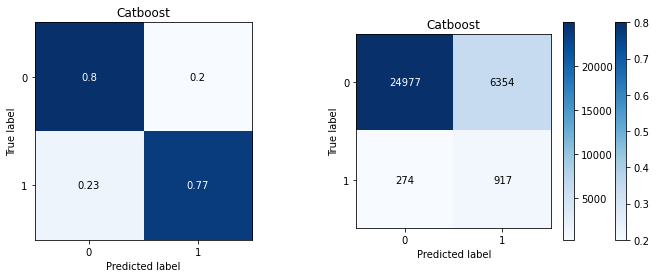

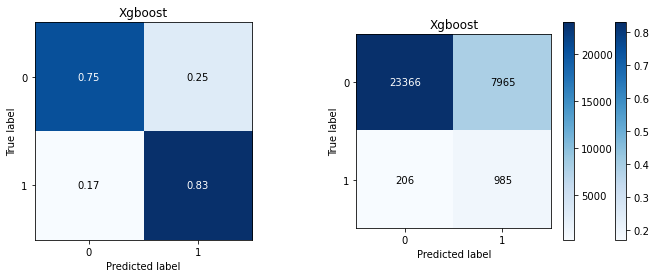

In [243]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
skplt.metrics.plot_confusion_matrix(y_test,jm_mp.prob_thresh(y_pred_test[:,1],jm_mp.ks_stat_func(y_test,y_pred_test[:,1])[1]),normalize = True,title ='Catboost',ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test,jm_mp.prob_thresh(y_pred_test[:,1],jm_mp.ks_stat_func(y_test,y_pred_test[:,1])[1]),normalize = False,title ='Catboost',ax = ax[1])
fig,ax2 = plt.subplots(1,2,figsize = (12,4))
skplt.metrics.plot_confusion_matrix(y_test2,jm_mp.prob_thresh(y_pred_test2[:,1],jm_mp.ks_stat_func(y_test2,y_pred_test2[:,1])[1]),normalize = True,title ='Xgboost',ax = ax2[0])
skplt.metrics.plot_confusion_matrix(y_test2,jm_mp.prob_thresh(y_pred_test2[:,1],jm_mp.ks_stat_func(y_test2,y_pred_test2[:,1])[1]),normalize = False,title ='Xgboost',ax = ax2[1])
plt.show()

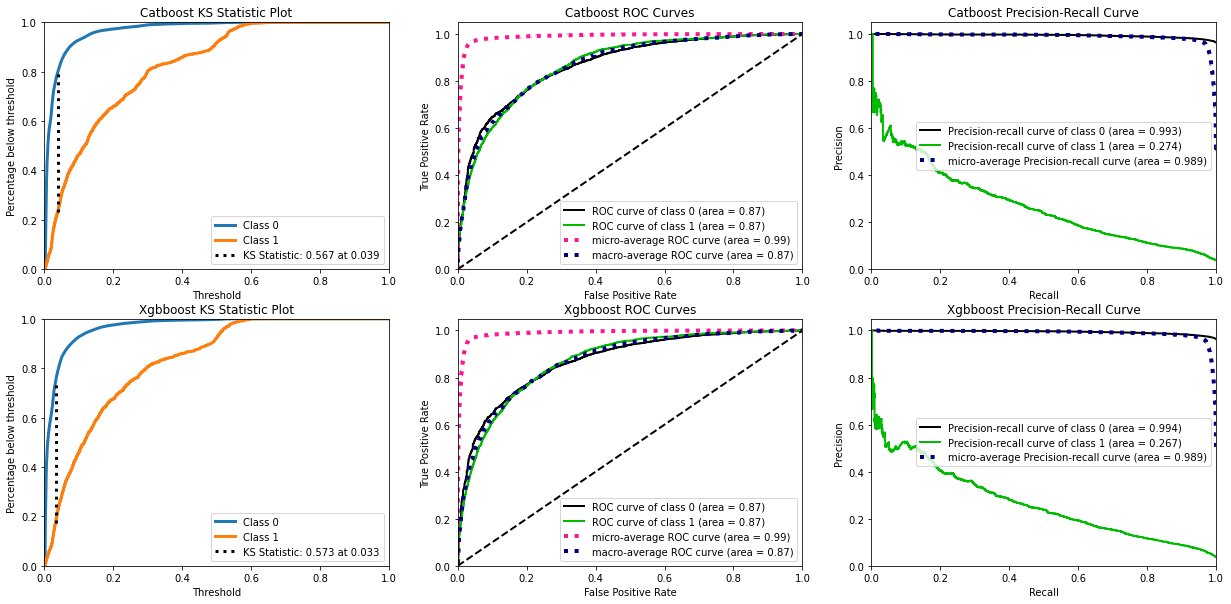

In [255]:
fig,ax = plt.subplots(2,3,figsize = (21,10))
skplt.metrics.plot_ks_statistic(y_test,y_pred_test,ax = ax[0,0],title = 'Catboost KS Statistic Plot')
skplt.metrics.plot_ks_statistic(y_test2,y_pred_test2,ax = ax[1,0],title = 'Xgbboost KS Statistic Plot')
skplt.metrics.plot_roc(y_test,y_pred_test,ax = ax[0,1],title = 'Catboost ROC Curves')
skplt.metrics.plot_roc(y_test2,y_pred_test2,ax = ax[1,1],title = 'Xgbboost ROC Curves')
skplt.metrics.plot_precision_recall_curve(y_test,y_pred_test,ax = ax[0,2],title = 'Catboost Precision-Recall Curve')
skplt.metrics.plot_precision_recall_curve(y_test2,y_pred_test2,ax = ax[1,2],title = 'Xgbboost Precision-Recall Curve')
plt.show()

In [262]:
jm_mp.display_sides(jm_mp.model_metrics_df(y_test, y_pred_test[:,1], y_train, y_pred_train[:,1],name = 'Catboost'),
jm_mp.model_metrics_df(y_test2, y_pred_test2[:,1], y_train2, y_pred_train2[:,1],name = 'Xgbboost'))

,KS(t=0.039),Roc,Log Loss,Brier Loss,Recall(t=0.039),Precision(t=0.039)
Catboost,,,,,,
Test Set,0.567,0.867,0.118,0.030,0.770,0.126
Training Set,0.575,0.874,0.115,0.030,0.769,0.129
Difference,0.008,0.006,0.003,0.001,-0.001,0.002
,KS(t=0.033),Roc,Log Loss,Brier Loss,Recall(t=0.033),Precision(t=0.033)
Xgbboost,,,,,,
Test Set,0.573,0.870,0.118,0.030,0.827,0.110
Training Set,0.598,0.881,0.114,0.030,0.842,0.113
Difference,0.026,0.011,0.004,0.001,0.015,0.003


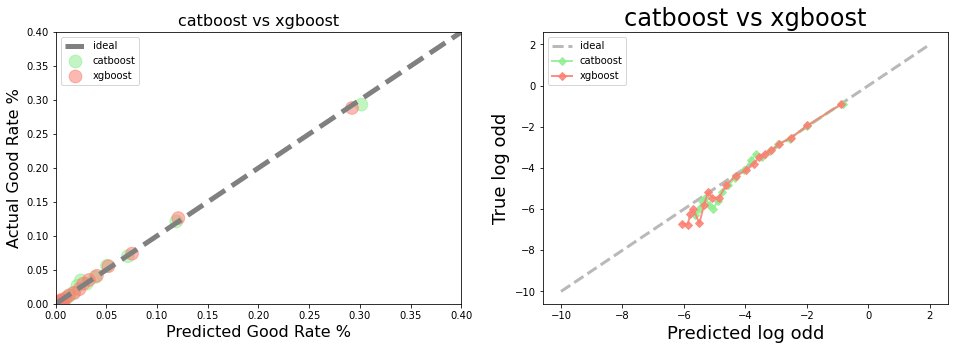

In [256]:
df_p1 = pd.DataFrame(dict(zip(['y','score'],[y_test,y_pred_test[:,1]])))
df_p2 = pd.DataFrame(dict(zip(['y','score'],[y_test2,y_pred_test2[:,1]])))
fig,ax =jm_mp.create_accuracy_plots(df_p1,df_p2,show_log_odd = True,num_bins = 20,labels = ['catboost','xgboost'],xlim =[0,0.4])

### Saving Models

In [264]:
out_put_path = r'D:\z7z8\DS_MiniProject_ANON'
with open(os.path.join(out_put_path,'catboost_model.pkl'),'wb') as f:
    pickle.dump(cbc,f)
with open(os.path.join(out_put_path,'catboost_features.pkl'),'wb') as f:
    pickle.dump(X_train.columns,f)
with open(os.path.join(out_put_path,'xgboost_model.pkl'),'wb') as f:
    pickle.dump(xgc,f)
with open(os.path.join(out_put_path,'xgboost_features.pkl'),'wb') as f:
    pickle.dump(X_train2.columns,f)

#### Functions

In [174]:

def roc_func(ground_truth, predictions):
    """Return Roc index. Takes input like y_test, model.predict_proba(X_test)[:, 1]"""
    return roc_auc_score(ground_truth, predictions)


def ks_stat_func(ground_truth, predictions):
    """Return KS stat. Takes input like y_test, model.predict_proba(X_test)[:, 1]"""
    thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = \
        skplt.helpers.binary_ks_curve(np.array(ground_truth), np.array(predictions).ravel())
    return ks_statistic, max_distance_at


def prob_thresh(probas, thresh):
    """Convert probability lists to 0s and 1s based on given threshold value. Strict threshold."""
    return [int(i) for i in (probas > thresh)]

def recall_precision_stat_func(ground_truth,probas,thresh):
    """The thresh is set when KS statistic is at the critical threshold value."""
    return (recall_score(ground_truth,prob_thresh(probas,thresh)),
            precision_score(ground_truth,prob_thresh(probas,thresh)))


def model_metrics_df(y_test, y_preda, y_train, y_preda_train, round_decimals=3):
    
    ks_test,ks_thresh    = ks_stat_func(y_test, y_preda)
    ks_train,ks_thresh   = ks_stat_func(y_train, y_preda_train)
    roc_test             = roc_func(y_test, y_preda)
    roc_train            = roc_func(y_train, y_preda_train)
    logloss_test         = log_loss(y_test, y_preda)
    logloss_train        = log_loss(y_train, y_preda_train)    
    brierloss_test       = brier_score_loss(y_test, y_preda)
    brierloss_train      = brier_score_loss(y_train, y_preda_train)        
    recall_test,precision_test    = recall_precision_stat_func(y_test, y_preda, ks_thresh)
    recall_train,precision_train  = recall_precision_stat_func(y_train, y_preda_train, ks_thresh)
    
    df_metrics = pd.DataFrame({f'KS(t={round(ks_thresh, round_decimals)})': [ks_test, ks_train, ks_train - ks_test],
                               'Roc': [roc_test, roc_train, roc_train - roc_test],
                               'Log Loss': [logloss_test, logloss_train, logloss_test - logloss_train],
                               'Brier Loss': [brierloss_test, brierloss_train, brierloss_test - brierloss_train],
                               f'Recall(t={round(ks_thresh, round_decimals)})': [recall_test, recall_train, recall_train - recall_test],
                               f'Precision(t={round(ks_thresh, round_decimals)})': [precision_test, precision_train, precision_train - precision_test]
                               },
                              index=['Test Set', 'Training Set', 'Difference']).round(decimals=round_decimals)
    
    return df_metrics

In [207]:
def create_accuracy_plots(df_s1,df_s2,show_log_odd = True,num_bins = 10,labels = ['catboost','xgboost'],xlim =[0,1]):

    nrows =2
    ncols =1
    if show_log_odd:
        if df_s1.shape[0]>0:
            df_s1['grp'] = pd.qcut(df_s1['score'],q=num_bins,duplicates = 'drop')
            df_scores_grp1 = df_s1.groupby('grp')[['y','score']].agg([np.mean,np.size])
            df_scores_grp1['logodd'] = [np.log(x/(1-x)) for x in df_scores_grp1[('y','mean')]]
            df_scores_grp1['logoddp'] = [np.log(x/(1-x)) for x in df_scores_grp1[('score','mean')]]
        if df_s2.shape[0]>0:
            df_s2['grp'] = pd.qcut(df_s2['score'],q=num_bins,duplicates = 'drop')
            df_scores_grp2 = df_s2.groupby('grp')[['y','score']].agg([np.mean,np.size])
            df_scores_grp2['logodd'] = [np.log(x/(1-x)) for x in df_scores_grp2[('y','mean')]]
            df_scores_grp2['logoddp'] = [np.log(x/(1-x)) for x in df_scores_grp2[('score','mean')]]
    
    fig, ax = plt.subplots(nrows,ncols,figsize = (10*ncols,7*nrows))
    if df_s1.shape[0]>0:
        if df_s1.shape[0]>0:
            g_y  = df_scores_grp1[('y','mean')]
            g_x  = df_scores_grp1[('score','mean')]
            ax[0].scatter(g_x,g_y, marker='s', linewidth=1,color = 'lightgreen'
                       ,alpha = 0.85,s =100,label = '{}'.format(labels[0]))
            prob_error = np.sqrt(((g_y-g_x)**2).mean())
        if df_s2.shape[0]>0:
            g2_y  = df_scores_grp2[('y','mean')]
            g2_x  = df_scores_grp2[('score','mean')]
            ax[0].scatter(g2_x,g2_y, marker='s', linewidth=1,color = 'salmon'
                   ,alpha = 0.85,s =100,label = '{}'.format(labels[1])) 
        
        ax[0].plot([0,1],[0,1],linestyle = '--',color = 'grey',linewidth =5,label = 'ideal')
        ax[0].set_title('{} vs {}'.format(labels[0],labels[1]),size = 16)
        ax[0].set_xlabel('Predicted Good Rate %',size = 16)
        ax[0].set_ylabel('Actual Good Rate %',size = 16)
        ax[0].set_xlim(xlim)
        ax[0].set_ylim(xlim)
        ax[0].legend(loc = 'upper left')
    
    if show_log_odd:
        ax[1].plot([-2,2],[-2,2],color = 'black',linewidth = 3,label = 'ideal',alpha =0.55)
        if df_s1.shape[0]>0:
            ax[1].plot(df_scores_grp1['logoddp'],df_scores_grp1['logodd'], marker='D', linewidth=2, label='{}'.format(labels[0]),color = 'lightgreen',alpha = 0.85)
        if df_s2.shape[0]>0:    
            ax[1].plot(df_scores_grp2['logoddp'],df_scores_grp2['logodd'], marker='D', linewidth=2, label='{}'.format(labels[1]),color = 'salmon',alpha = 0.85)
        ax[1].set_title('{} vs {}'.format(labels[0],labels[1]),size = 24)
        ax[1].set_xlabel('Predicted log odd',size = 18)
        ax[1].set_ylabel('True log odd',size = 18)
        ax[1].legend(loc = 'upper left')

    plt.show() 
    return fig,ax